<a href="https://colab.research.google.com/github/kfaisalofficial/Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#version of pandas running on the system
pd.__version__ 

'1.3.5'

In [3]:
#version of numpy running on the system
np.__version__

'1.21.5'

In [4]:
#mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
#importing the data
file_path="/content/drive/MyDrive/Colab Notebooks/hotel analysis/"
hotel_df=pd.read_csv(file_path+"Copy of Hotel Bookings.csv")

In [6]:
#copying the dataset
df=hotel_df.copy(deep=True)

In [7]:
#information about the dataframe
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#first 5 rows of the data frame
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
#To know no of rows and columns in the data frame
hotel_df.shape

(119390, 32)

In [10]:
#basic statistical details-percentiles between 20 and 50 and data type of int and float
hotel_df.describe(percentiles=[.20,.50],include=[int,float])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
20%,0.000000,11.000000,2016.000000,14.000000,7.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,45.000000,0.000000,64.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Finding the null values

In [26]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [27]:
hotel_df.isnull().sum().sort_values(ascending=False)[:10]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
agent                          0
dtype: int64

# Filling the null values with relevant values 

In [28]:

hotel_df[['agent','company']] =hotel_df[['agent','company']].fillna(0.0)


In [29]:

hotel_df['country'].fillna(hotel_df.country.mode()[0], inplace=True)

In [30]:
hotel_df['children'].fillna(round(hotel_df.children.mean()), inplace=True)

# removing the rows which are not contributing to the dataframe

In [31]:
hotel_df[(hotel_df.adults+hotel_df.babies+hotel_df.children)==0].shape

(0, 32)

In [32]:
hotel_df = hotel_df.drop(hotel_df[(hotel_df.adults+hotel_df.babies+hotel_df.children)==0].index)

# Fixing the datatype

In [33]:
#finding the datatypes of each column
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [34]:
#children, company and agent shuld have int dtype
hotel_df[["children","company","agent"]]=hotel_df[["children","company","agent"]].astype('int64')

# Bookings that were cancelled vs not cancelled

In [35]:
booking_cancelled_count=hotel_df["is_canceled"].value_counts()

In [36]:
booking_cancelled_count

0    75011
1    44199
Name: is_canceled, dtype: int64

Text(0.5, 1.0, 'Booking got cancelled vs not cancelled')

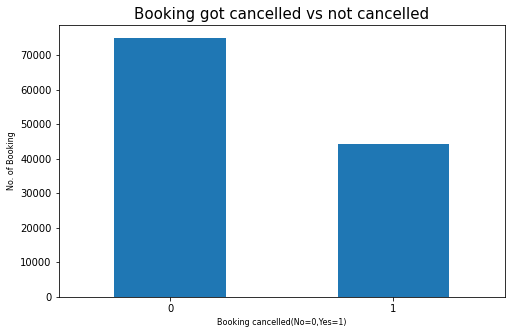

In [37]:
plot1=booking_cancelled_count.plot(kind='bar',rot=0,figsize=(8,5))
plt.xlabel("Booking cancelled(No=0,Yes=1)",fontsize=8)
plt.ylabel("No. of Booking",fontsize=8)
plt.title("Booking got cancelled vs not cancelled",fontsize=15)


# 

In [38]:
booking_months_count=df["arrival_date_month"].value_counts()

In [39]:
booking_months_count

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

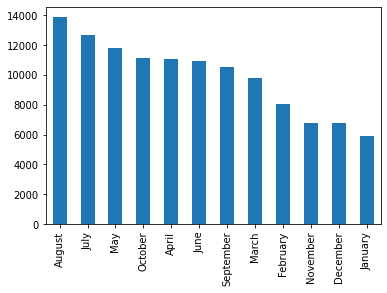

In [40]:
booking_months_count.plot(kind='bar')

# Finding the ratio of booking between the hotels

In [41]:
hotel_counts=hotel_df["hotel"].value_counts()

In [42]:
hotel_counts

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

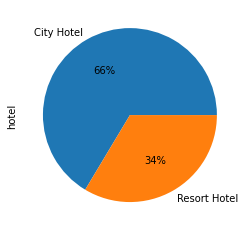

In [43]:
hotel_counts.plot(kind='pie',autopct='%1.0f%%')

city hotel has 66% of the total bookings and Resort hotel has 34%

# Popular Meal

In [50]:
meal_count=hotel_df["meal"].value_counts()

In [51]:
meal_count

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

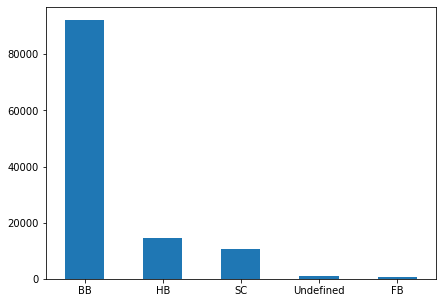

In [52]:
meal_count.plot(kind='bar',figsize=(7,5),rot=0)

BB meal is most popular and FB is least

# analysing the booking country wise

In [47]:
bookings_from_country=hotel_df["country"].value_counts()[:10]

In [48]:
bookings_from_country

PRT    48961
GBR    12120
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
Name: country, dtype: int64

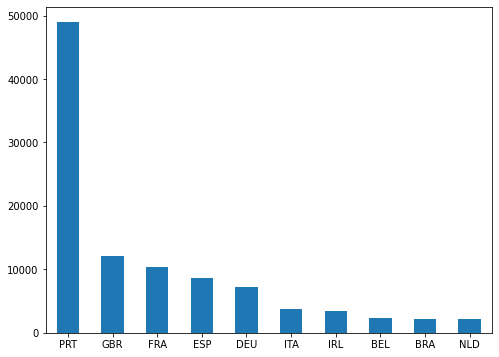

In [49]:
bookings_from_country.plot(kind='bar',figsize=(8,6),rot=0)

The highest bookings are from PRT country